#Class 3

Materials and examples are derived from Hadley Wickham's text book
https://r4ds.had.co.nz/introduction.html

## 1. Into the Tidyverse
Bracket subsetting is handy, but it can be cumbersome and difficult to read, especially for complicated operations. The tidyverse package is an “umbrella-package” that installs several packages useful for data analysis which work together well such as `tidyr`, `dplyr`, `ggplot2`, `tibble`, etc. We have used already the ggplot2 package. Now we are going to learn about the two packages useful to work with data:

- `dplyr` is a package for making tabular data manipulation easier.
- `tidyr` enables you to swiftly convert between different data formats.


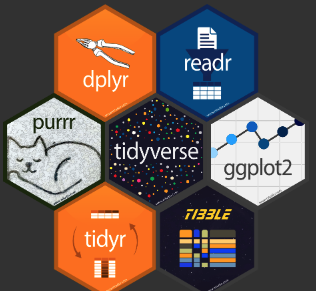

Materials largely derrived from Hadley Wickhams book
https://r4ds.had.co.nz/explore-intro.html

Great supplemental resource: https://www.youtube.com/watch?v=K-ss_ag2k9E

The goal of the first part of this book is to get you up to speed with the basic tools of data exploration as quickly as possible. Data exploration is the art of looking at your data, rapidly generating hypotheses, quickly testing them, then repeating again and again and again. The goal of data exploration is to generate many promising leads that you can later explore in more depth.

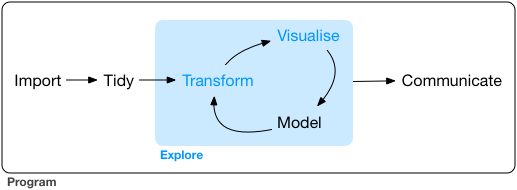

Imports and Packages

In [1]:
install.packages("gapminder")
install.packages("nycflights13")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
#-- Data Analysis Packages
library("tidyverse")
library("dplyr")

#-- Data
library("nycflights13") #--> may need to install first!
library("gapminder") #--> may need to install first!

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Reading Data
- Tidyverse has many built-in datasets that we will mostly use for practice
- read_csv(). etc

In [3]:
path <- 'https://raw.githubusercontent.com/GWC-DCMB/curriculum-notebooks/master/SampleData/tips.csv'
df <- readr::read_csv(path)
head(df)

Rows: 244 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): sex, smoker, day, time
dbl (3): total_bill, tip, size

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


total_bill tip  sex    smoker day time   size
1 16.99      1.01 Female No     Sun Dinner 2   
2 10.34      1.66 Male   No     Sun Dinner 3   
3 21.01      3.50 Male   No     Sun Dinner 3   
4 23.68      3.31 Male   No     Sun Dinner 2   
5 24.59      3.61 Female No     Sun Dinner 4   
6 25.29      4.71 Male   No     Sun Dinner 4

## 2. Basic Data Wrangling

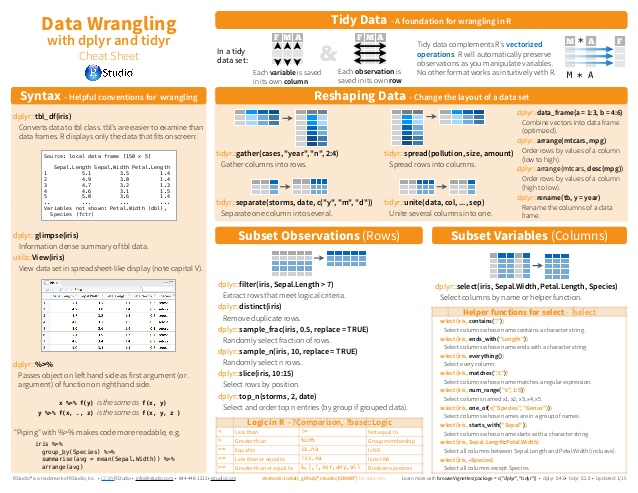

### Tibbles and Data Types
#### Tibbles
For data science in R you will use `tibbles` instead of R’s traditional data.frame. Tibbles are data frames, but they tweak some older behaviours to make life a little easier. R is an old language, and some things that were useful 10 or 20 years ago now get in your way. It’s difficult to change base R without breaking existing code, so most innovation occurs in packages. Here we will describe the tibble package, which provides opinionated data frames that make working in the tidyverse a little easier. In most places, Most people use the term tibble and data frame interchangeably.

We’ll explore the `tibble` package, part of the core `tidyverse`



#### Data Types in the Tidyverse
- `int` stands for integers.
- `dbl` stands for doubles, or real numbers.
- `chr` stands for character vectors, or strings.
- `dttm` stands for date-times (a date + a time).
- `lgl` stands for logical, vectors that contain only TRUE or FALSE.
- `fctr` stands for factors, which R uses to represent categorical variables with fixed possible values.
- `date` stands for dates.

#### Column names in Tibbles...
- should not have spaces
- should be unique
To repair column names...
```
colnames(df_all) <- make.names(colnames(df_all_og))
```

Gapminder

This data set has been generated using data from the Gapminder website, which focuses on gathering and sharing statistics and other information about social, economic and environmental development at local, national and global levels.

#### Getting to know your dataset

In [ ]:
#-- to view the head of the DataFrame
head(gapminder, 5)

country     continent year lifeExp pop      gdpPercap
1 Afghanistan Asia      1952 28.801   8425333 779.4453 
2 Afghanistan Asia      1957 30.332   9240934 820.8530 
3 Afghanistan Asia      1962 31.997  10267083 853.1007 
4 Afghanistan Asia      1967 34.020  11537966 836.1971 
5 Afghanistan Asia      1972 36.088  13079460 739.9811

In [ ]:
#-- To view the tail of the DataFrame
tail(gapminder, 3)

country  continent year lifeExp pop      gdpPercap
1 Zimbabwe Africa    1997 46.809  11404948 792.4500 
2 Zimbabwe Africa    2002 39.989  11926563 672.0386 
3 Zimbabwe Africa    2007 43.487  12311143 469.7093

In [ ]:
#-- Get number of columns
ncol(gapminder)

[1] 6

In [ ]:
#-- Get number of rows
nrow(gapminder)

[1] 1704

In [ ]:
#-- to access single column
head(gapminder["country"])

country    
1 Afghanistan
2 Afghanistan
3 Afghanistan
4 Afghanistan
5 Afghanistan
6 Afghanistan

In [ ]:
head(gapminder$country)

[1] Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan
142 Levels: Afghanistan Albania Algeria Angola Argentina Australia ... Zimbabwe

#### Filtering

`filter()` allows you to subset observations based on their values. The first argument is the name of the data frame. The second and subsequent arguments are the expressions that filter the data frame. For example, we can select all flights on January 1st with:

In [ ]:
#-- Filter gapminder for only the year 2002
year_2002 <- dplyr::filter(gapminder, year == 2002)
head(year_2002, 3)

country     continent year lifeExp pop      gdpPercap
1 Afghanistan Asia      2002 42.129  25268405  726.7341
2 Albania     Europe    2002 75.651   3508512 4604.2117
3 Algeria     Africa    2002 70.994  31287142 5288.0404

What is the `::`? This is a way to specify where the function comes from. This is similar to Python with import pandas as pd then calling pd.DataFrame(). In this example, the `.` in Python is akin to `::` in R

In [ ]:
#-- Filter with multiple arguments evaluates to `AND` logic
year_2000 <- dplyr::filter(gapminder, year == 2002, continent == 'Asia', pop >= 100000000)
head(year_2000, 10)

country    continent year lifeExp pop        gdpPercap
1 Bangladesh Asia      2002 62.013   135656790  1136.390
2 China      Asia      2002 72.028  1280400000  3119.281
3 India      Asia      2002 62.879  1034172547  1746.769
4 Indonesia  Asia      2002 68.588   211060000  2873.913
5 Japan      Asia      2002 82.000   127065841 28604.592
6 Pakistan   Asia      2002 63.610   153403524  2092.712

To use filtering effectively, you have to know how to select the observations that you want using the comparison operators. R provides the standard suite: `>`, `>=`, `<`, `<=`, `!=` (not equal), and `==` (equal).

When you’re starting out with R, the easiest mistake to make is to use = instead of == when testing for equality. When this happens you’ll get an informative error:

In [ ]:
#-- Filter gapminder for only the US and Canada using the or operator
filtered_df <- dplyr::filter(gapminder, country=='United States' | country=='Canada', year==2002)
head(filtered_df, 3)

country       continent year lifeExp pop       gdpPercap
1 Canada        Americas  2002 79.77    31902268 33328.97 
2 United States Americas  2002 77.31   287675526 39097.10

A useful short-hand for this problem is x `%in%` y. This will select every row where x is one of the values in y. We could use it to rewrite the code above:

In [ ]:
#-- Filter gapminder for only the US and Canada using the %in% operator
keep_countries <- c('United States', 'Canada')
filtered_df <- dplyr::filter(gapminder, country %in% keep_countries, year==2002)
head(filtered_df, 3)

country       continent year lifeExp pop       gdpPercap
1 Canada        Americas  2002 79.77    31902268 33328.97 
2 United States Americas  2002 77.31   287675526 39097.10

It’s not uncommon to get datasets with hundreds or even thousands of variables. In this case, the first challenge is often narrowing in on the variables you’re actually interested in. `select()` allows you to rapidly zoom in on a useful subset using operations based on the names of the variables.

`select()` is not terribly useful with the flights data because we only have 19 variables, but you can still get the general idea:

In [ ]:
head(dplyr::select(gapminder, country, continent, pop),5)


country     continent pop     
1 Afghanistan Asia       8425333
2 Afghanistan Asia       9240934
3 Afghanistan Asia      10267083
4 Afghanistan Asia      11537966
5 Afghanistan Asia      13079460

#### Creating New Variables

Besides selecting sets of existing columns, it’s often useful to add new columns that are functions of existing columns. That’s the job of `mutate()`.

`mutate()` always adds new columns at the end of your dataset so we’ll start by creating a narrower dataset so we can see the new variables. Remember that when you’re in RStudio, the easiest way to see all the columns is `View()`.

In [ ]:
head(gapminder)

country     continent year lifeExp pop      gdpPercap
1 Afghanistan Asia      1952 28.801   8425333 779.4453 
2 Afghanistan Asia      1957 30.332   9240934 820.8530 
3 Afghanistan Asia      1962 31.997  10267083 853.1007 
4 Afghanistan Asia      1967 34.020  11537966 836.1971 
5 Afghanistan Asia      1972 36.088  13079460 739.9811 
6 Afghanistan Asia      1977 38.438  14880372 786.1134

In [ ]:
#-- Notice we have population and GDP per Capita, but not GDP, Let's back out GDP
gapminder <- dplyr::mutate(gapminder,
  GDP = pop * gdpPercap
)
head(gapminder,4)

country     continent year lifeExp pop      gdpPercap GDP       
1 Afghanistan Asia      1952 28.801   8425333 779.4453  6567086330
2 Afghanistan Asia      1957 30.332   9240934 820.8530  7585448670
3 Afghanistan Asia      1962 31.997  10267083 853.1007  8758855797
4 Afghanistan Asia      1967 34.020  11537966 836.1971  9648014150

#### Groupby

`summarise()` is not terribly useful unless we pair it with `group_by()`. This changes the unit of analysis from the complete dataset to individual groups. Then, when you use the dplyr verbs on a grouped data frame they’ll be automatically applied “by group”. For example, if we applied exactly the same code to a data frame grouped by date, we get the average delay per date:

In [ ]:
by_continent <- group_by(gapminder, continent)
summarise(by_continent, avg_gdp = mean(GDP, na.rm = TRUE))

continent avg_gdp     
1 Africa     20904782844
2 Americas  379262350210
3 Asia      227233738153
4 Europe    269442085301
5 Oceania   188187105354

In [ ]:
summarise(group_by(gapminder, continent), avg_gdp = mean(GDP, na.rm = TRUE))

continent avg_gdp     
1 Africa     20904782844
2 Americas  379262350210
3 Asia      227233738153
4 Europe    269442085301
5 Oceania   188187105354

In [ ]:
by_year <- group_by(gapminder, year)
summarise(by_year, avg_gdp = mean(GDP, na.rm = TRUE))

year avg_gdp     
1  1952  49561190904
2  1957  62649777593
3  1962  77495568413
4  1967 100338690564
5  1972 129728407146
6  1977 157170394501
7  1982 178746382573
8  1987 212202795902
9  1992 242964158844
10 1997 288775189215
11 2002 332861503428
12 2007 409220666999

#### The `Pipe` Operator
This focuses on the transformations, not what’s being transformed, which makes the code easier to read. You can read it as a series of imperative statements: group, then summarise, then filter. As suggested by this reading, a good way to pronounce %>% when reading code is “then”.

Behind the scenes, x `%>%` f(y) turns into f(x, y), and x %>% f(y) %>% g(z) turns into g(f(x, y), z) and so on. You can use the pipe to rewrite multiple operations in a way that you can read left-to-right, top-to-bottom. We’ll use piping frequently from now on because it considerably improves the readability of code, and we’ll come back to it in more detail in pipes.

Working with the pipe is one of the key criteria for belonging to the tidyverse. The only exception is ggplot2: it was written before the pipe was discovered. Unfortunately, the next iteration of ggplot2, ggvis, which does use the pipe, isn’t quite ready for prime time yet.

In [ ]:
by_continent <- gapminder %>%
                  group_by(continent) %>%
                    summarise(
                      mean(GDP, na.rm = TRUE)
                    )
head(by_continent, 3)

continent mean(GDP, na.rm = TRUE)
1 Africa     20904782844           
2 Americas  379262350210           
3 Asia      227233738153

In [ ]:
#-- And you can keep piping different functions
by_year <- gapminder %>%
            group_by(year) %>%
            summarise(
              mean(GDP, na.rm = TRUE)
            ) %>%
            filter(year > 1990)
head(by_year, 3)

year mean(GDP, na.rm = TRUE)
1 1992 242964158844           
2 1997 288775189215           
3 2002 332861503428

##3. Reading in Data

### Google Colab

To `import` data, in Google Colab, you must add the data into their specific environment.

#### Step 1: Select the folder button

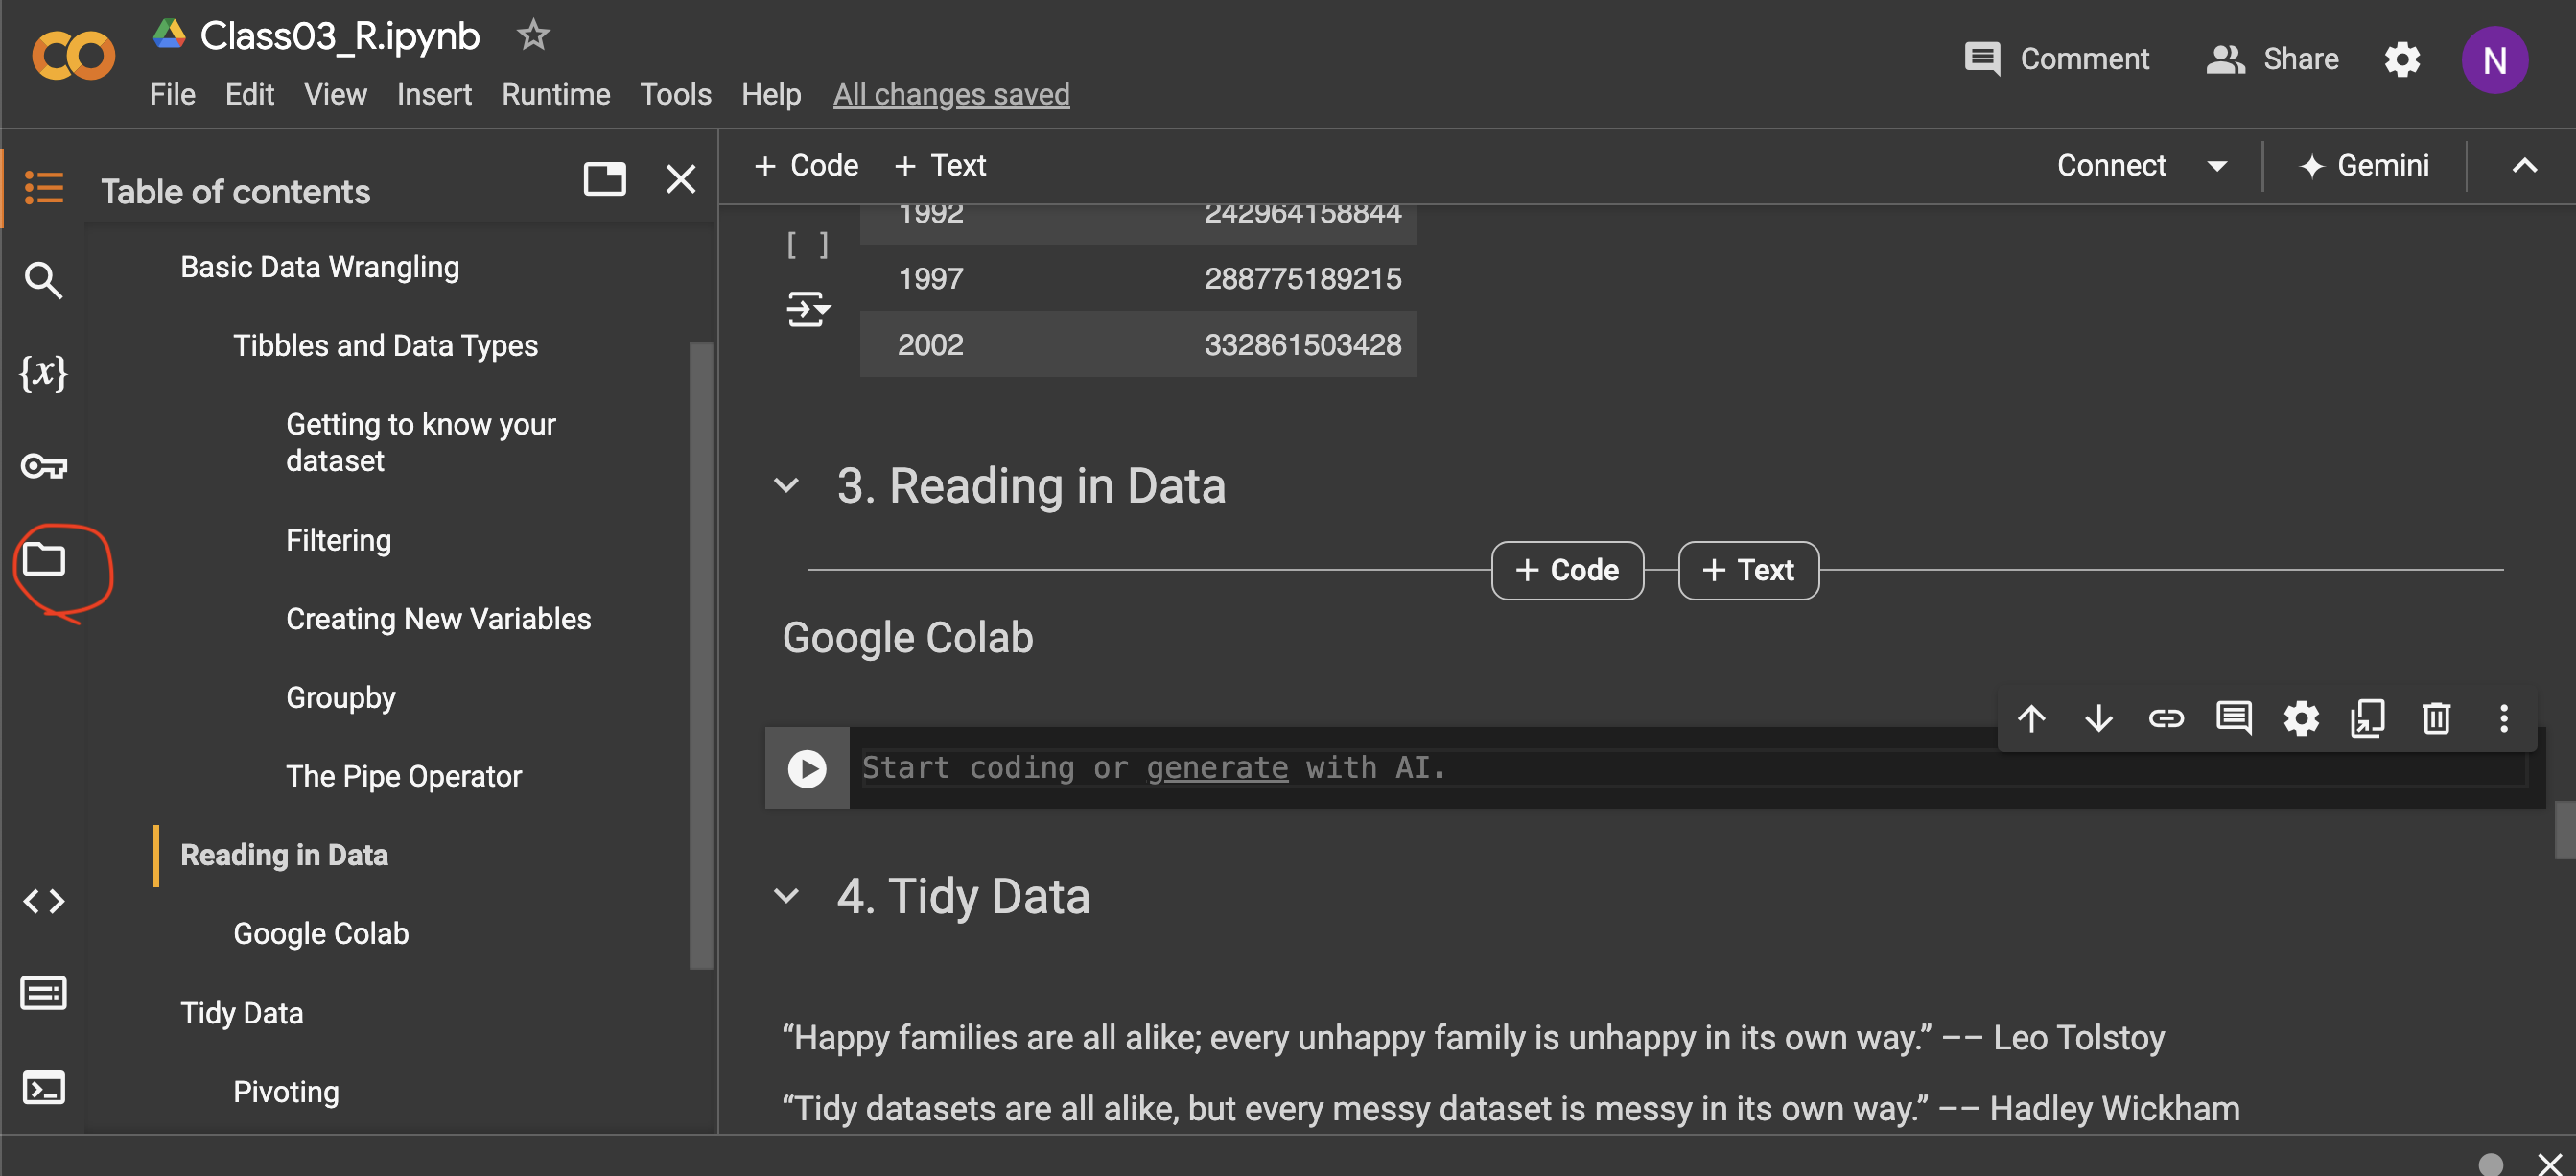

#### Step 2: Use the upload button, or drag and drop your file

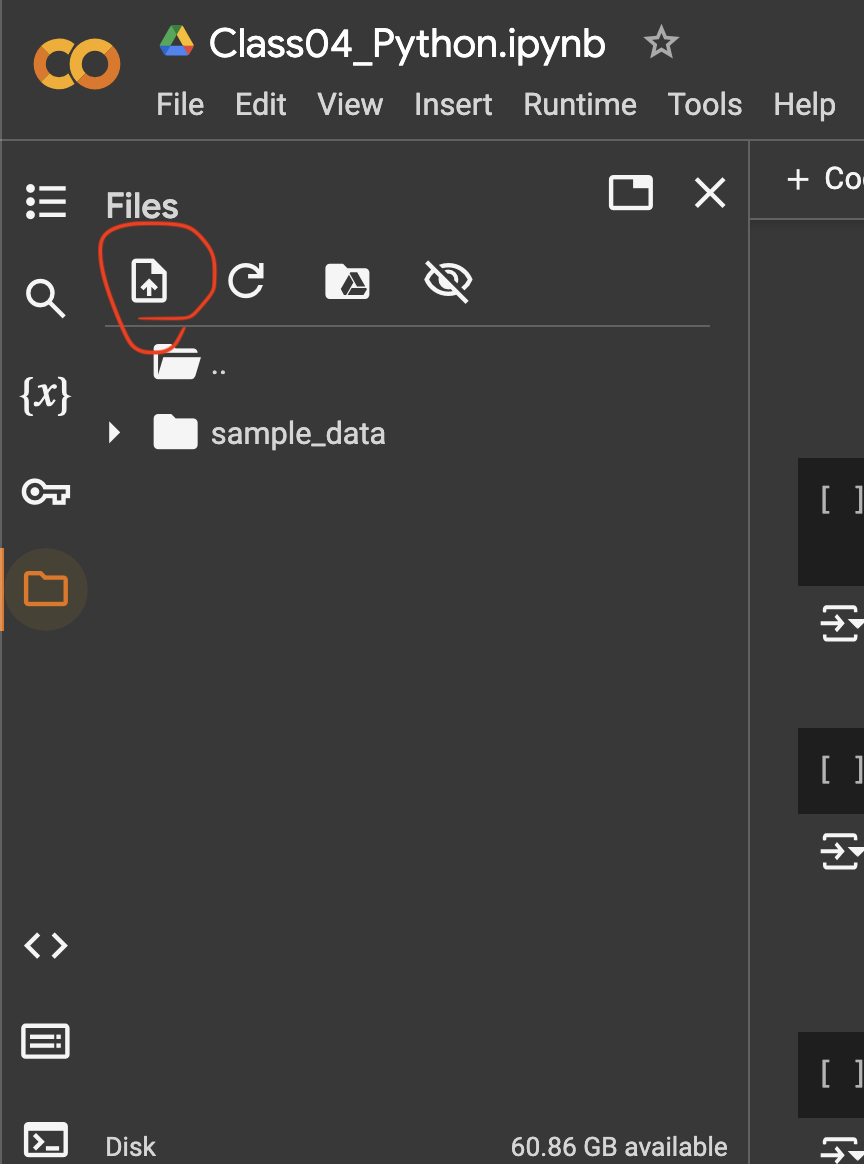

### R Studio

`Step 1`: Set your working directory
```
setwd('/Users/edwardhulseman/Desktop')
```

`Step 2`: Use the appropriate readr function
e.g. for a csv
```
install.packages("tidyverse")

library("tidyverse")
library(dplyr)
path <- "day (1).csv"

df <- readr::read_csv(path)
```

## 4. Tidy Data

“Happy families are all alike; every unhappy family is unhappy in its own way.” –– Leo Tolstoy

“Tidy datasets are all alike, but every messy dataset is messy in its own way.” –– Hadley Wickham

In this chapter, you will learn a consistent way to organise your data in R, an organisation called tidy data. Getting your data into this format requires some upfront work, but that work pays off in the long term. Once you have tidy data and the tidy tools provided by packages in the tidyverse, you will spend much less time munging data from one representation to another, allowing you to spend more time on the analytic questions at hand.

#### Pivoting

This means for most real analyses, you’ll need to do some tidying. The first step is always to figure out what the variables and observations are. Sometimes this is easy; other times you’ll need to consult with the people who originally generated the data. The second step is to resolve one of two common problems:

- One variable might be spread across multiple columns.

- One observation might be scattered across multiple rows.

Typically a dataset will only suffer from one of these problems; it’ll only suffer from both if you’re really unlucky! To fix these problems, you’ll need the two most important functions in tidyr: `pivot_longer()` and `pivot_wider()`.

In [ ]:
head(gapminder)

country     continent year lifeExp pop      gdpPercap GDP        
1 Afghanistan Asia      1952 28.801   8425333 779.4453   6567086330
2 Afghanistan Asia      1957 30.332   9240934 820.8530   7585448670
3 Afghanistan Asia      1962 31.997  10267083 853.1007   8758855797
4 Afghanistan Asia      1967 34.020  11537966 836.1971   9648014150
5 Afghanistan Asia      1972 36.088  13079460 739.9811   9678553274
6 Afghanistan Asia      1977 38.438  14880372 786.1134  11697659231

In [ ]:
gapminder_long <- gapminder %>%
  pivot_longer(
    lifeExp:GDP,
    names_to = "measure",
    values_to = "value"
  )
  head(gapminder_long, 10)


country     continent year measure   value       
1  Afghanistan Asia      1952 lifeExp   2.880100e+01
2  Afghanistan Asia      1952 pop       8.425333e+06
3  Afghanistan Asia      1952 gdpPercap 7.794453e+02
4  Afghanistan Asia      1952 GDP       6.567086e+09
5  Afghanistan Asia      1957 lifeExp   3.033200e+01
6  Afghanistan Asia      1957 pop       9.240934e+06
7  Afghanistan Asia      1957 gdpPercap 8.208530e+02
8  Afghanistan Asia      1957 GDP       7.585449e+09
9  Afghanistan Asia      1962 lifeExp   3.199700e+01
10 Afghanistan Asia      1962 pop       1.026708e+07

In [ ]:
gapminder_wide <- gapminder %>%
  pivot_wider(
    names_from = year,
    values_from = c(lifeExp, pop, gdpPercap, GDP)
  )
  head(gapminder_wide, 10)


country     continent lifeExp_1952 lifeExp_1957 lifeExp_1962 lifeExp_1967
1  Afghanistan Asia      28.801       30.332       31.997       34.020      
2  Albania     Europe    55.230       59.280       64.820       66.220      
3  Algeria     Africa    43.077       45.685       48.303       51.407      
4  Angola      Africa    30.015       31.999       34.000       35.985      
5  Argentina   Americas  62.485       64.399       65.142       65.634      
6  Australia   Oceania   69.120       70.330       70.930       71.100      
7  Austria     Europe    66.800       67.480       69.540       70.140      
8  Bahrain     Asia      50.939       53.832       56.923       59.923      
9  Bangladesh  Asia      37.484       39.348       41.216       43.453      
10 Belgium     Europe    68.000       69.240       70.250       70.940      
   lifeExp_1972 lifeExp_1977 lifeExp_1982 lifeExp_1987 ⋯ GDP_1962    
1  36.088       38.438       39.854       40.822       ⋯   8758855797
2  67.690       68.930       70.420       72.000       ⋯   3996988985
3  54.518       58.014       61.368       65.799       ⋯  28061403854
4  37.928       39.483       39.942       39.906       ⋯  20603593596
5  67.065       68.481       69.942       70.774       ⋯ 151820757737
6  71.930       73.490       74.740       76.320       ⋯ 131884573002
7  70.630       72.170       73.180       74.940       ⋯  76651179416
8  63.300       65.593       69.052       70.750       ⋯   2191816125
9  45.252       46.923       50.009       52.819       ⋯  39011165929
10 71.440       72.800       73.930       75.350       ⋯ 101321340396
   GDP_1967     GDP_1972     GDP_1977     GDP_1982     GDP_1987    
1    9648014150   9678553274  11697659231  12598563401  11820990309
2    5476396323   7500110047   8864476394  10094200603  11498418358
3   41433235247  61739408943  84227416174 115097120653 132119742845
4   28980597822  32264255583  18541315838  19343845633  19136019189
5  184688236498 233996596624 271970723960 264010673179 289004799539
6  172457986742 221223770658 258037329175 295742804309 355853119294
7   94680836236 125698652513 149472120218 163589550350 179527736065
8    2993238336   4216406356   5751939724   7261179715   8421243626
9   45306268650  44594887096  53072807954  63009685013  78028572052
10 125658812132 161871509038 187772921748 206783717985 222331812712
   GDP_1992     GDP_1997     GDP_2002     GDP_2007    
1   10595901589  14121995875  18363410424  31079291949
2    8307722183  10945912519  16153932130  21376411360
3  132102425043 139467033682 165447670333 207444851958
4   22956828370  22486820881  30134833901  59583895818
5  316104097627 397053586287 337223430800 515033625357
6  409511234952 501223252921 599847158654 703658358894
7  214036739550 234800471832 264148781752 296229400691
8   10079167850  12146009862  15362026094  21112675360
9   95262852014 119957417048 154159077921 209311822134
10 256922515586 281118335091 314369518653 350141166520

## 4. Joins

`Outer Join`
Let’s say you want to have a table that contains all your user and event table data together.

You would use an Outer Join to join the tables together. An outer join combines the columns from all tables on one or more common dimension when possible, and includes all data from all tables.

`Inner Join`
What if you want to have a table that contains only users that have done an action?

You would use an Inner Join to join the tables together. An inner join combines the columns on a common dimension (the first N columns) when possible, and only includes data for the columns that share the same values in the common N column(s). In the example, the User ID would be the common dimension used for the inner join.

`Left Join`
Now, what if you want to have a table that contains all the users’ data and only actions that those users have done? Actions performed by other users not in the users table should not be included?

You would use a Left Join to join the tables together. A left join combines the columns on a common dimension (the first N columns) when possible, returning all rows from the first table with the matching rows in the consecutive tables. The result is NULL in the consecutive tables when there is no match. In this case, we would make the User Table the first (left table) to use for the left join.

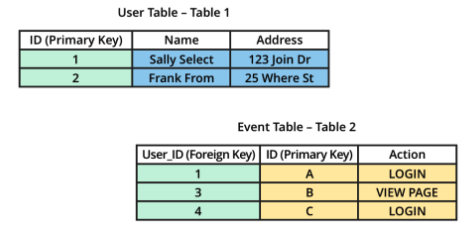

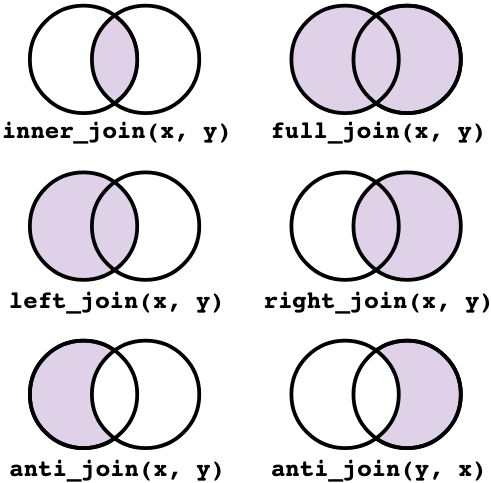

In [ ]:
head(airlines,10)

carrier name                       
1  9E      Endeavor Air Inc.          
2  AA      American Airlines Inc.     
3  AS      Alaska Airlines Inc.       
4  B6      JetBlue Airways            
5  DL      Delta Air Lines Inc.       
6  EV      ExpressJet Airlines Inc.   
7  F9      Frontier Airlines Inc.     
8  FL      AirTran Airways Corporation
9  HA      Hawaiian Airlines Inc.     
10 MQ      Envoy Air

In [ ]:
head(flights,10)

year month day dep_time sched_dep_time dep_delay arr_time sched_arr_time
1  2013 1     1   517      515             2         830      819          
2  2013 1     1   533      529             4         850      830          
3  2013 1     1   542      540             2         923      850          
4  2013 1     1   544      545            -1        1004     1022          
5  2013 1     1   554      600            -6         812      837          
6  2013 1     1   554      558            -4         740      728          
7  2013 1     1   555      600            -5         913      854          
8  2013 1     1   557      600            -3         709      723          
9  2013 1     1   557      600            -3         838      846          
10 2013 1     1   558      600            -2         753      745          
   arr_delay carrier flight tailnum origin dest air_time distance hour minute
1   11       UA      1545   N14228  EWR    IAH  227      1400     5    15    
2   20       UA      1714   N24211  LGA    IAH  227      1416     5    29    
3   33       AA      1141   N619AA  JFK    MIA  160      1089     5    40    
4  -18       B6       725   N804JB  JFK    BQN  183      1576     5    45    
5  -25       DL       461   N668DN  LGA    ATL  116       762     6     0    
6   12       UA      1696   N39463  EWR    ORD  150       719     5    58    
7   19       B6       507   N516JB  EWR    FLL  158      1065     6     0    
8  -14       EV      5708   N829AS  LGA    IAD   53       229     6     0    
9   -8       B6        79   N593JB  JFK    MCO  140       944     6     0    
10   8       AA       301   N3ALAA  LGA    ORD  138       733     6     0    
   time_hour          
1  2013-01-01 05:00:00
2  2013-01-01 05:00:00
3  2013-01-01 05:00:00
4  2013-01-01 05:00:00
5  2013-01-01 06:00:00
6  2013-01-01 05:00:00
7  2013-01-01 06:00:00
8  2013-01-01 06:00:00
9  2013-01-01 06:00:00
10 2013-01-01 06:00:00

Left Join

In [ ]:
left_merge_example <- flights %>%
          left_join(airlines, by = "carrier")
head(left_merge_example,3)

year month day dep_time sched_dep_time dep_delay arr_time sched_arr_time
1 2013 1     1   517      515            2         830      819           
2 2013 1     1   533      529            4         850      830           
3 2013 1     1   542      540            2         923      850           
  arr_delay carrier flight tailnum origin dest air_time distance hour minute
1 11        UA      1545   N14228  EWR    IAH  227      1400     5    15    
2 20        UA      1714   N24211  LGA    IAH  227      1416     5    29    
3 33        AA      1141   N619AA  JFK    MIA  160      1089     5    40    
  time_hour           name                  
1 2013-01-01 05:00:00 United Air Lines Inc. 
2 2013-01-01 05:00:00 United Air Lines Inc. 
3 2013-01-01 05:00:00 American Airlines Inc.